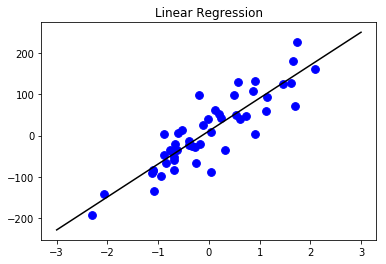

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
X, y = make_regression(n_samples=50, n_features=1, n_informative=1,
                       noise=50,random_state=1)
reg = LinearRegression()
reg.fit(X,y)
z = np.linspace(-3,3,200).reshape(-1,1)
plt.scatter(X,y,c='b',s=60)
plt.plot(z, reg.predict(z),c='k')
plt.title('Linear Regression')

In [2]:
print('直线的斜率是：{:.2f}'.format(reg.coef_[0]))
print('直线的截距是：{:.2f}'.format(reg.intercept_))

直线的斜率是：79.52
直线的截距是：10.92


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X, y = make_regression(n_samples=100,n_features=2,n_informative=2,random_state=38)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)
lr = LinearRegression().fit(X_train, y_train)

In [4]:
print("lr.coef_: {}".format(lr.coef_[:]))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [ 70.38592453   7.43213621]
lr.intercept_: -1.4210854715202004e-14


In [5]:
print("训练数据集得分：{:.2f}".format(lr.score(X_train, y_train)))
print("测试数据集得分：{:.2f}".format(lr.score(X_test, y_test)))

训练数据集得分：1.00
测试数据集得分：1.00


In [20]:
from sklearn.datasets import load_diabetes
#X, y = make_regression(n_samples=500,n_features=50,n_informative=25,noise=500,
                      #random_state=8)
X, y = load_diabetes().data, load_diabetes().target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8)
lr = LinearRegression().fit(X_train, y_train)

In [21]:
X.shape, y.shape

((442, 10), (442,))

In [22]:
print("训练数据集得分：{:.2f}".format(lr.score(X_train, y_train)))
print("测试数据集得分：{:.2f}".format(lr.score(X_test, y_test)))

训练数据集得分：0.53
测试数据集得分：0.46


In [23]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("训练数据集得分：{:.2f}".format(ridge.score(X_train, y_train)))
print("测试数据集得分：{:.2f}".format(ridge.score(X_test, y_test)))

训练数据集得分：0.43
测试数据集得分：0.43


In [24]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("训练数据集得分：{:.2f}".format(ridge10.score(X_train, y_train)))
print("测试数据集得分：{:.2f}".format(ridge10.score(X_test, y_test)))

训练数据集得分：0.15
测试数据集得分：0.16


In [30]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("训练数据得分：{:.2f}".format(ridge01.score(X_train, y_train)))
print("测试数据的分：{:.2f}".format(ridge01.score(X_test, y_test)))

训练数据得分：0.52
测试数据的分：0.47


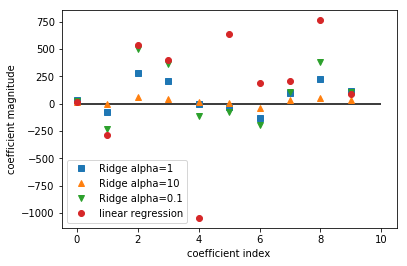

In [33]:
plt.plot(ridge.coef_, 's', label = 'Ridge alpha=1')
plt.plot(ridge10.coef_, '^', label = 'Ridge alpha=10')
plt.plot(ridge01.coef_, 'v', label = 'Ridge alpha=0.1')
plt.plot(lr.coef_, 'o', label = 'linear regression')
plt.xlabel("coefficient index")
plt.ylabel("coefficient magnitude")
plt.hlines(0,0, len(lr.coef_))
#plt.ylim(-25,25)
plt.legend(loc='best')

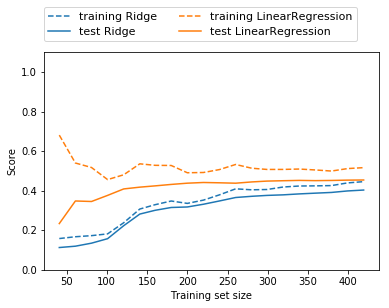

In [40]:
from sklearn.model_selection import learning_curve,KFold

def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(
        est, X, y, train_sizes=np.linspace(.1, 1, 20), cv=KFold(20, shuffle=True, 
                                                                random_state=1))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--',
                    label="training " + estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-',
             label="test " + estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.ylabel('Score')
    plt.ylim(0, 1.1)
    
plot_learning_curve(Ridge(alpha=1), X, y)
plot_learning_curve(LinearRegression(), X, y)
plt.legend(loc=(0, 1.05), ncol=2, fontsize=11)

In [41]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("套索回归在训练数据集的得分：{:.2f}".format(lasso.score(X_train, y_train)))
print("套索回归在测试数据集的得分：{:.2f}".format(lasso.score(X_test, y_test)))
print("套索回归使用的特征数：{}".format(np.sum(lasso.coef_ != 0)))

套索回归在训练数据集的得分：0.36
套索回归在测试数据集的得分：0.37
套索回归使用的特征数：3


In [45]:
#增加最大迭代次数的默认设置
#否则模型会提示我们增加最大迭代次数
lasso01 = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)
print("alpha=0.1时套索回归在训练数据集的得分：{:.2f}".format(lasso001.score(X_train, y_train)))
print("alpha=0.1时套索回归在测试数据集的得分：{:.2f}".format(lasso001.score(X_test, y_test)))
print("alpha=0.1时套索回归使用的特征数：{}".format(np.sum(lasso001.coef_ != 0)))

alpha=0.1时套索回归在训练数据集的得分：0.52
alpha=0.1时套索回归在测试数据集的得分：0.48
alpha=0.1时套索回归使用的特征数：7


In [46]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("alpha=0.0001时套索回归在训练数据集的得分：{:.2f}".format(lasso00001.score(X_train, y_train)))
print("alpha=0.0001时套索回归在测试数据集的得分：{:.2f}".format(lasso00001.score(X_test, y_test)))
print("alpha=0.0001时套索回归使用的特征数：{}".format(np.sum(lasso00001.coef_ != 0)))

alpha=0.0001时套索回归在训练数据集的得分：0.53
alpha=0.0001时套索回归在测试数据集的得分：0.46
alpha=0.0001时套索回归使用的特征数：10


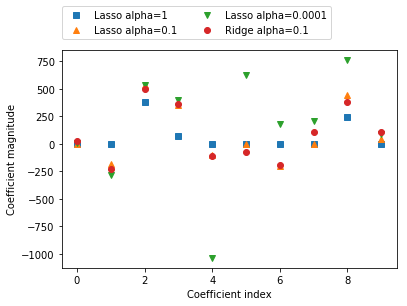

In [49]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso01.coef_, '^', label="Lasso alpha=0.1")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2,loc=(0,1.05))
#plt.ylim(-25,25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
h = .02  # step size in the mesh

names = [ "Linear SVC", "Logistic Regression"]

classifiers = [
   LinearSVC(),
LogisticRegression()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

#datasets = [make_moons(noise=0.3, random_state=0),
 #           make_circles(noise=0.2, factor=0.5, random_state=1),
  #          linearly_separable
   #         ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

NameError: name 'datasets' is not defined

In [57]:
mglearn.plots.plot_linear_svc_regularization()

NameError: name 'mglearn' is not defined